# Enterprise Sprint 3

## Tratamento de dados

Criando dataframe e familiarizando com os dados

In [ ]:
import pandas as pd
import numpy as np

dados = pd.read_excel('Base_Final_Consolidada_Sprint3.xlsx')

dados.head()

Munic√≠pio  Safra  √Årea Plantada (ha)  √Årea Colhida (ha)  \
0  Campo Novo do Parecis   2019              380000             380000   
1  Campo Novo do Parecis   2020              389000             389000   
2  Campo Novo do Parecis   2021              371711             371711   
3  Campo Novo do Parecis   2022              387800             387800   
4  Campo Novo do Parecis   2023              407800             407800   

   Produ√ß√£o (ton)  Rendimento M√©dio (kg/ha)  NDVI_m√©dio_safra  \
0         1276800                      3360            0.6026   
1         1377060                      3540            0.6218   
2         1304958                      3511            0.6242   
3         1396080                      3600            0.6573   
4         1571355                      3853            0.6605   

   Precipitacao_total_mm  Temp_max_media  Temp_min_media  Umidade_media  \
0                  797.0       28.380392       21.079739      84.954248   
1                  992.0       28.302210       20.685635      82.292818   
2                 1159.6       28.160773       20.472376      84.303867   
3                 1121.6       27.998895       20.056354      82.618785   
4                  143.1       30.002439       20.585366      84.339024   

   Dias_com_chuva_20mm  Dias_sem_chuva_1mm  
0                    6                  45  
1                    5                  52  
2                    8                  46  
3                   14                  52  
4                    1                  21

In [ ]:
dados.dtypes

Munic√≠pio                    object
Safra                         int64
√Årea Plantada (ha)            int64
√Årea Colhida (ha)             int64
Produ√ß√£o (ton)                int64
Rendimento M√©dio (kg/ha)      int64
NDVI_m√©dio_safra            float64
Precipitacao_total_mm       float64
Temp_max_media              float64
Temp_min_media              float64
Umidade_media               float64
Dias_com_chuva_20mm           int64
Dias_sem_chuva_1mm            int64
dtype: object

In [ ]:
dados.isnull().sum()

Munic√≠pio                   0
Safra                       0
√Årea Plantada (ha)          0
√Årea Colhida (ha)           0
Produ√ß√£o (ton)              0
Rendimento M√©dio (kg/ha)    0
NDVI_m√©dio_safra            0
Precipitacao_total_mm       0
Temp_max_media              0
Temp_min_media              0
Umidade_media               0
Dias_com_chuva_20mm         0
Dias_sem_chuva_1mm          0
dtype: int64

## An√°lise estat√≠stica e correla√ß√£o

In [ ]:
# Importar bibliotecas necess√°rias
from scipy.stats import pearsonr, spearmanr

# Selecionar apenas colunas num√©ricas relevantes
variaveis = [
    'NDVI_m√©dio_safra',
    'Rendimento M√©dio (kg/ha)',
    'Precipitacao_total_mm',
    'Temp_max_media',
    'Temp_min_media',
    'Umidade_media',
    'Dias_com_chuva_20mm',
    'Dias_sem_chuva_1mm'
]

# Calcular correla√ß√£o de Pearson e Spearman
correlacoes = []

for var1 in variaveis:
    for var2 in variaveis:
        if var1 != var2:
            pearson, _ = pearsonr(dados[var1], dados[var2])
            spearman, _ = spearmanr(dados[var1], dados[var2])
            correlacoes.append({
                'Vari√°vel 1': var1,
                'Vari√°vel 2': var2,
                'Pearson': round(pearson, 4),
                'Spearman': round(spearman, 4)
            })

# Exibir resultados em DataFrame
df_corr = pd.DataFrame(correlacoes)
df_corr = df_corr[df_corr['Vari√°vel 1'] < df_corr['Vari√°vel 2']]
df_corr


Vari√°vel 1                Vari√°vel 2  Pearson  Spearman
0           NDVI_m√©dio_safra  Rendimento M√©dio (kg/ha)   0.1663    0.1259
1           NDVI_m√©dio_safra     Precipitacao_total_mm   0.2671    0.3950
2           NDVI_m√©dio_safra            Temp_max_media   0.5885    0.6416
3           NDVI_m√©dio_safra            Temp_min_media   0.4907    0.6023
4           NDVI_m√©dio_safra             Umidade_media  -0.4743   -0.3557
9   Rendimento M√©dio (kg/ha)            Temp_max_media   0.5508    0.4555
10  Rendimento M√©dio (kg/ha)            Temp_min_media   0.0349    0.0486
11  Rendimento M√©dio (kg/ha)             Umidade_media  -0.5443   -0.4122
15     Precipitacao_total_mm  Rendimento M√©dio (kg/ha)  -0.0923    0.1998
16     Precipitacao_total_mm            Temp_max_media   0.1618    0.1127
17     Precipitacao_total_mm            Temp_min_media   0.3125    0.1592
18     Precipitacao_total_mm             Umidade_media  -0.4950   -0.3596
24            Temp_max_media            Temp_min_media   0.7452    0.7746
25            Temp_max_media             Umidade_media  -0.6714   -0.2558
32            Temp_min_media             Umidade_media  -0.3620   -0.3274
42       Dias_com_chuva_20mm          NDVI_m√©dio_safra   0.1601    0.1309
43       Dias_com_chuva_20mm  Rendimento M√©dio (kg/ha)   0.3637    0.3180
44       Dias_com_chuva_20mm     Precipitacao_total_mm   0.7186    0.6571
45       Dias_com_chuva_20mm            Temp_max_media   0.4590    0.0251
46       Dias_com_chuva_20mm            Temp_min_media   0.2795    0.0987
47       Dias_com_chuva_20mm             Umidade_media  -0.6126   -0.4201
48       Dias_com_chuva_20mm        Dias_sem_chuva_1mm   0.7040    0.3390
49        Dias_sem_chuva_1mm          NDVI_m√©dio_safra   0.0361    0.1056
50        Dias_sem_chuva_1mm  Rendimento M√©dio (kg/ha)   0.0412    0.0144
51        Dias_sem_chuva_1mm     Precipitacao_total_mm   0.6118    0.0699
52        Dias_sem_chuva_1mm            Temp_max_media   0.3804    0.1165
53        Dias_sem_chuva_1mm            Temp_min_media   0.5448    0.4928
54        Dias_sem_chuva_1mm             Umidade_media  -0.5300   -0.5842

A correla√ß√£o entre o NDVI m√©dio da safra e a produtividade foi fraca (Pearson = 0,1663), indicando que o NDVI isolado n√£o √© um bom preditor direto da produtividade agr√≠cola.
Por outro lado, o NDVI apresentou correla√ß√£o moderada com a temperatura m√°xima (Pearson = 0,5885) e correla√ß√£o negativa com a umidade (Pearson = -0,4743), o que sugere que ele est√° mais associado √†s condi√ß√µes clim√°ticas do que diretamente ao rendimento.
A produtividade tamb√©m apresentou correla√ß√£o moderada com a temperatura e negativa com a umidade, refor√ßando a import√¢ncia desses fatores no resultado final da safra.

## Regress√£o Linear

In [ ]:
# Definir vari√°veis independentes para a regress√£o
variaveis = [
    'NDVI_m√©dio_safra',
    'Precipitacao_total_mm',
    'Temp_max_media',
    'Temp_min_media',
    'Umidade_media'
]

# Rodar regress√£o linear simples para cada vari√°vel
from sklearn.linear_model import LinearRegression

resultados = []

for var in variaveis:
    X = dados[[var]]
    y = dados['Rendimento M√©dio (kg/ha)']

    modelo = LinearRegression()
    modelo.fit(X, y)

    coef = modelo.coef_[0]
    intercepto = modelo.intercept_
    r2 = modelo.score(X, y)

    resultados.append({
        'Vari√°vel': var,
        'Coeficiente': round(coef, 2),
        'Intercepto': round(intercepto, 2),
        'R¬≤': round(r2, 4)
    })

# Criar DataFrame com os resultados
df_regressao = pd.DataFrame(resultados)
df_regressao

Vari√°vel  Coeficiente  Intercepto      R¬≤
0       NDVI_m√©dio_safra       898.10     2945.49  0.0276
1  Precipitacao_total_mm        -0.06     3608.59  0.0085
2         Temp_max_media       102.88      529.07  0.3033
3         Temp_min_media        10.12     3328.35  0.0012
4          Umidade_media       -61.18     8618.15  0.2963

Foram testadas regress√µes lineares simples entre produtividade e cinco vari√°veis independentes (NDVI e clima). Os melhores resultados foram obtidos com temperatura m√°xima (R¬≤ = 0,3033) e umidade m√©dia (R¬≤ = 0,2963), que apresentaram rela√ß√£o moderada com a produtividade.
Por outro lado, o NDVI e a precipita√ß√£o apresentaram valores de R¬≤ muito baixos, indicando baixo poder preditivo isolado.
Isso refor√ßa a ideia de que a produtividade agr√≠cola depende de m√∫ltiplos fatores combinados, e n√£o apenas de um √∫nico indicador.

## Gr√°ficos

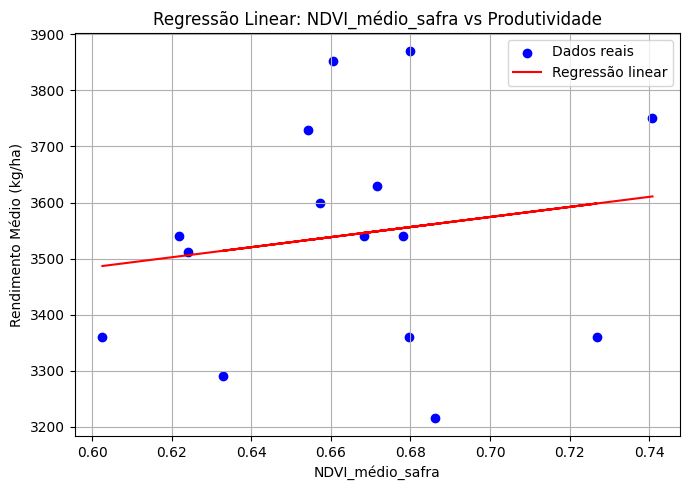

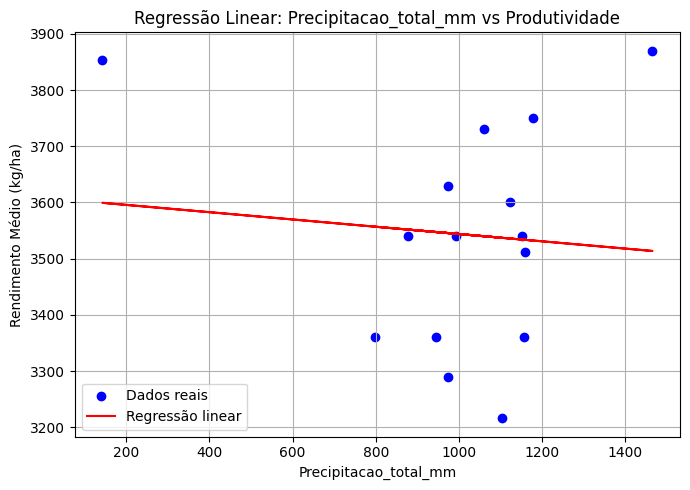

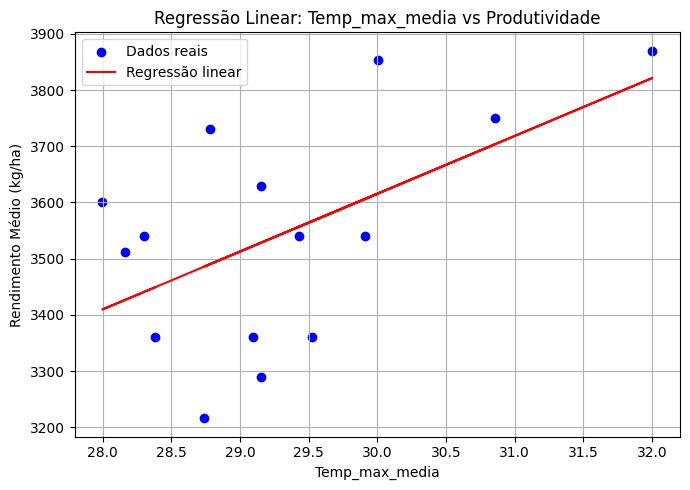

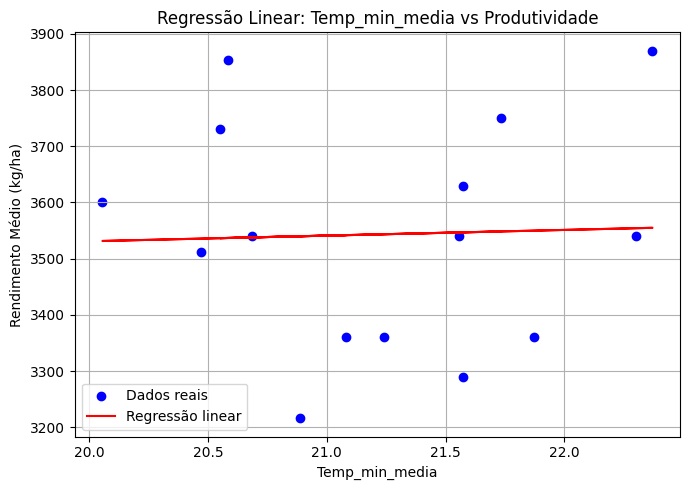

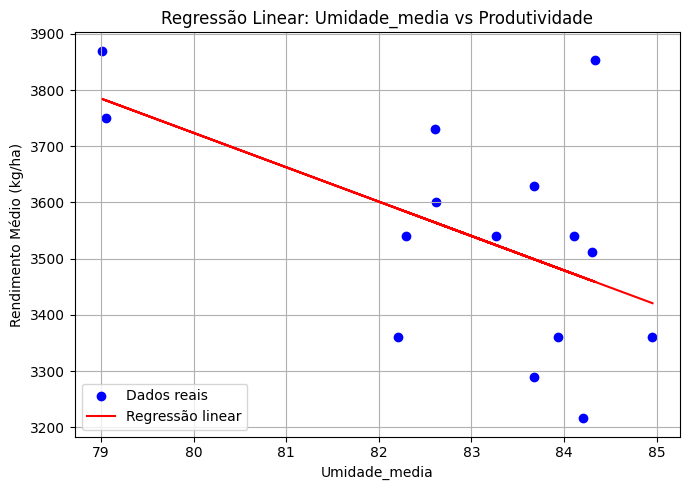

In [ ]:
import matplotlib.pyplot as plt
variaveis = [
    'NDVI_m√©dio_safra',
    'Precipitacao_total_mm',
    'Temp_max_media',
    'Temp_min_media',
    'Umidade_media'
]

for var in variaveis:
    X = dados[[var]]
    y = dados['Rendimento M√©dio (kg/ha)']

    modelo = LinearRegression()
    modelo.fit(X, y)

    # Predi√ß√£o
    y_pred = modelo.predict(X)

    # Gr√°fico
    plt.figure(figsize=(7, 5))
    plt.scatter(X, y, color='blue', label='Dados reais')
    plt.plot(X, y_pred, color='red', label='Regress√£o linear')
    plt.title(f'Regress√£o Linear: {var} vs Produtividade')
    plt.xlabel(var)
    plt.ylabel('Rendimento M√©dio (kg/ha)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Discuss√£o dos Resultados e An√°lise Cr√≠tica

### üìä An√°lise Estat√≠stica ‚Äì Correla√ß√£o

As an√°lises de correla√ß√£o de Pearson e Spearman demonstraram que a vari√°vel **NDVI m√©dio da safra** apresenta **correla√ß√£o fraca com a produtividade agr√≠cola** (Pearson = 0,1663). Isso indica que, isoladamente, o NDVI **n√£o √© um bom preditor da produtividade** na base analisada.

Por outro lado, o NDVI mostrou correla√ß√£o **moderada com a temperatura m√°xima (Pearson = 0,5885)** e **negativa com a umidade relativa (Pearson = -0,4743)**. Isso sugere que o NDVI pode refletir com mais clareza as condi√ß√µes clim√°ticas da vegeta√ß√£o do que propriamente os rendimentos.

A produtividade apresentou correla√ß√£o **negativa com a umidade (Pearson = -0,5443)** e **moderada com a temperatura m√°xima (Pearson = 0,5508)**, refor√ßando a ideia de que condi√ß√µes clim√°ticas impactam significativamente a produ√ß√£o agr√≠cola.

---

### üìâ An√°lise de Regress√£o Linear Simples

Regress√µes lineares simples foram aplicadas com diferentes vari√°veis independentes, buscando estimar a produtividade agr√≠cola. Os principais resultados foram:

- **NDVI m√©dio da safra**  
  - R¬≤ = 0,0276  
  - Baixo poder explicativo.

- **Precipita√ß√£o total (mm)**  
  - R¬≤ = 0,0085  
  - Rela√ß√£o praticamente inexistente.

- **Temperatura m√°xima (¬∞C)**  
  - R¬≤ = 0,3033  
  - Melhor desempenho individual entre as vari√°veis.

- **Umidade m√©dia (%)**  
  - R¬≤ = 0,2963  
  - Rela√ß√£o moderada e negativa.

- **Temperatura m√≠nima (¬∞C)**  
  - R¬≤ = 0,0012  
  - N√£o apresentou relev√¢ncia.

Com isso, observa-se que **nenhuma vari√°vel isoladamente explica bem a produtividade**, embora temperatura e umidade tenham apresentado **rela√ß√µes mais consistentes**.

---

### ‚ö†Ô∏è Limita√ß√µes da An√°lise

- A base de dados possui **apenas 15 registros** agregados por munic√≠pio e safra, o que limita a robustez estat√≠stica.
- Os dados representam m√©dias por safra, ou seja, **n√£o h√° granularidade por talh√£o, fazenda ou m√™s**.
- N√£o foram considerados outros fatores como **tipo de solo, t√©cnicas de manejo, pragas, irriga√ß√£o ou aplica√ß√£o de insumos**, que poderiam influenciar fortemente os resultados.

---

### üí° Sugest√µes de Melhoria

- **Ampliar o n√∫mero de safras** e incluir mais munic√≠pios e culturas.
- Incluir **vari√°veis agron√¥micas e operacionais** (fertiliza√ß√£o, sementes, pr√°ticas de manejo).
- Aplicar modelos preditivos mais robustos, como **regress√£o m√∫ltipla** ou **algoritmos de machine learning multivariado**.
- Analisar o NDVI em diferentes momentos da safra (ex: vegetativo, flora√ß√£o) para melhor alinhamento com o rendimento.

---

### ‚úÖ Conclus√£o

Embora o NDVI seja um importante indicador vegetativo, sua **aplica√ß√£o isolada para predi√ß√£o de produtividade n√£o foi eficaz** nesta base. As vari√°veis clim√°ticas apresentaram maior influ√™ncia, mas ainda insuficientes para uma predi√ß√£o confi√°vel. Para aplica√ß√µes pr√°ticas, ser√° necess√°rio **integrar mais vari√°veis e ampliar a base de dados**.

